# Matrix Factorization without and with Bias
## Load user rating file, covert the rating file into user-item matrix

In [1]:
import numpy as np
import pandas as pd

ratingfile = 'ratings.data'
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(ratingfile, sep='\t', names=header)

n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))

user_item_matrix = np.zeros((n_users, n_items))
for line in df.itertuples():
    user_item_matrix[line[1] - 1, line[2] - 1] = line[3]

Number of users = 943 | Number of movies = 1682


## Split the user-item matrix set into training set and testing set

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# split the data set into training set and testing set
train_data, test_data = train_test_split(df, test_size=0.25)

# transfer the train set and test set of ratings to user-item matrix
    
train = pd.DataFrame(train_data)
test = pd.DataFrame(test_data)

train_matrix = np.zeros((n_users, n_items))
for line in train.itertuples():
    train_matrix[int(line[1]) - 1, int(line[2]) - 1] = line[3]

test_matrix = np.zeros((n_users, n_items))
for line in test.itertuples():
    test_matrix[int(line[1]) - 1, int(line[2]) - 1] = line[3]  


## Compute the Rooted mean square error to evaluate the accuaracy

In [3]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(pred_rate, true_rate):
    prediction = pred_rate[true_rate.nonzero()].flatten() 
    true_rate = true_rate[true_rate.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, true_rate))

## Get the index for the non-zero rating in training and testing user-item matrix 

In [4]:
# Index matrix for training data
train_ind = train_matrix.copy()
train_ind[train_ind > 0] = 1
train_ind[train_ind == 0] = 0

# Index matrix for test data
test_ind = test_matrix.copy()
test_ind[test_ind > 0] = 1
test_ind[test_ind == 0] = 0

## Prediction function

In [5]:
# Predict the unknown ratings through the dot product of the latent features for users and items and the bias
def prediction_sgd_bias(P, Q, b_global, b_user, b_item):
    ratings = np.dot(P, Q.T)
    for u in range(len(b_user)):
        for i in range(len(b_item)):
            ratings[u][i] = b_global +  b_user[u] + b_item[i] + ratings[u][i]
    return ratings

## Rooted mean square error computation function

In [6]:
# Calculate the RMSE for SGD (without bias)
def sgd_rmse(ind, data_matrix, P, Q):
    return np.sqrt(np.sum((ind * (data_matrix - np.dot(P, Q.T)))**2)/len(data_matrix[data_matrix > 0]))

# Calculate the RMSE for SGD with bias
def sgd_bias_rmse(ind, data_matrix, P, Q, b_global, b_user, b_item):
    return np.sqrt(np.sum((ind * (data_matrix - prediction_sgd_bias(P, Q, b_global, b_user, b_item)))**2)/len(data_matrix[data_matrix > 0]))

## Stochastic Gradient Descent (SGD) function

In [7]:
def sgd(train, test, train_ind, test_ind, factor_k, alpha, lmbda, iteration):
    print ("Computing using SGD ......")
    
    train_errors = []
    test_errors = []
    
    m, n = train.shape # Number of users and items in training set
    
    # initialize Latent user feature matrix and Latent movie feature matrix
    P = 3 * np.random.rand(m, factor_k)  # Latent user feature matrix
    Q = 3 * np.random.rand(n, factor_k)  # Latent movie feature matrix
    
    # Only consider non-zero elements in the training matrix
    users, items = train.nonzero()
    for it in range(iteration): #iteration: how many times of updating P, Q
        print("SGD Iteration", it)
        for u, i in zip(users, items):
            e = train[u, i] - (np.dot(P[u], Q[i].T))  # Calculate error for gradient
            P[u] += alpha * (e * Q[i] - lmbda * P[u])  # Update latent user feature matrix
            Q[i] += alpha * (e * P[u] - lmbda * Q[i])  # Update latent movie feature matrix
        train_rmse = sgd_rmse(train_ind, train, P, Q)  # Calculate root mean squared error from train dataset
        test_rmse = sgd_rmse(test_ind, test, P, Q)  # Calculate root mean squared error from test dataset
        train_errors.append(train_rmse)
        test_errors.append(test_rmse)

    return train_errors, test_errors

## Prediction using SGD
** It is important to note that SGD with 100 iterations may take more than 10 minutes or more to complete! (depend on your computer) **

In [22]:
factor_k = 20 # number of latent features
alpha = 0.01 # Learning rate
lmbda = 0.1 # Regularisation weight
iteration = 100 # number of iteration
# use stochastic gradient descent to optimize the prediction
train_errors_sgd, test_errors_sgd = sgd(train_matrix, test_matrix, train_ind, test_ind, factor_k, alpha, lmbda, iteration)

Computing using SGD ......
SGD Iteration 0
SGD Iteration 1
SGD Iteration 2
SGD Iteration 3
SGD Iteration 4
SGD Iteration 5
SGD Iteration 6
SGD Iteration 7
SGD Iteration 8
SGD Iteration 9
SGD Iteration 10
SGD Iteration 11
SGD Iteration 12
SGD Iteration 13
SGD Iteration 14
SGD Iteration 15
SGD Iteration 16
SGD Iteration 17
SGD Iteration 18
SGD Iteration 19
SGD Iteration 20
SGD Iteration 21
SGD Iteration 22
SGD Iteration 23
SGD Iteration 24
SGD Iteration 25
SGD Iteration 26
SGD Iteration 27
SGD Iteration 28
SGD Iteration 29
SGD Iteration 30
SGD Iteration 31
SGD Iteration 32
SGD Iteration 33
SGD Iteration 34
SGD Iteration 35
SGD Iteration 36
SGD Iteration 37
SGD Iteration 38
SGD Iteration 39
SGD Iteration 40
SGD Iteration 41
SGD Iteration 42
SGD Iteration 43
SGD Iteration 44
SGD Iteration 45
SGD Iteration 46
SGD Iteration 47
SGD Iteration 48
SGD Iteration 49
SGD Iteration 50
SGD Iteration 51
SGD Iteration 52
SGD Iteration 53
SGD Iteration 54
SGD Iteration 55
SGD Iteration 56
SGD Iteration 

In [23]:
print(test_errors_sgd[90:100])

[0.9825567945335318, 0.9822557889978765, 0.9819636743440636, 0.9816800977797835, 0.9814047214517256, 0.9811372217459278, 0.9808772886390182, 0.9806246250944941, 0.9803789464988262, 0.9801399801328196]


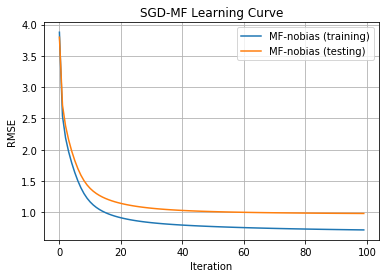

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# Check performance by plotting train and test errors
plt.plot(range(100), train_errors_sgd, linestyle='-', label='MF-nobias (training)')
plt.plot(range(100), test_errors_sgd, linestyle='-', label='MF-nobias (testing)')
plt.title('SGD-MF Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

## Matrix Factoriztion with Bias (SGD)

In [16]:
import math #for the function "math.isnan()"

def sgd_bias(train, test, train_ind, test_ind, factor_k, alpha, lmbda, iteration):
    print ("Computing using SGD ......")
    
    train_errors = []
    test_errors = []

    m, n = train.shape # Number of users and items in training set
    
    b_global=np.mean(train[train_ind>0])
    b_user=[]
    b_item=[]
    for u in range(len(train)):
        try:
            train_u=train[u][train_ind[u]>0]
            if not math.isnan(np.mean(train_u)): #because nan is not the exception
                b_user.append(np.mean(train_u)-b_global)
            else:
                b_user.append(0)
        except:
            b_user.append(0)
    for i in range(len(train[0])):
        try:
            train_i=train[:,i][train_ind[:,i]>0]
            if not math.isnan(np.mean(train_i)):
                b_item.append(np.mean(train_i)-b_global)
            else:
                b_item.append(0)
        except:
            b_item.append(0)
    
    # initialize Latent user feature matrix and Latent movie feature matrix
    P = 3 * np.random.rand(m, factor_k)  # Latent user feature matrix
    Q = 3 * np.random.rand(n, factor_k)  # Latent movie feature matrix
    
    # Only consider non-zero elements in the training matrix
    users, items = train.nonzero()
    for it in range(iteration): #iteration: how many times of updating P, Q
        print("SGD Iteration", it)
        for u, i in zip(users, items):
            e = train[u, i] - (np.dot(P[u], Q[i].T)+b_global+b_user[u]+b_item[i])  # Calculate error for gradient
            P[u] += alpha * (e * Q[i] - lmbda * (P[u]+b_global+b_user[u]+b_item[i]))  # Update latent user feature matrix
            Q[i] += alpha * (e * P[u] - lmbda * (Q[i]+b_global+b_user[u]+b_item[i]))  # Update latent movie feature matrix
            
        train_rmse = sgd_bias_rmse(train_ind, train, P, Q, b_global, b_user, b_item)  # Calculate root mean squared error from train dataset
        test_rmse = sgd_bias_rmse(test_ind, test, P, Q, b_global, b_user, b_item)  # Calculate root mean squared error from test dataset
        print(train_rmse,test_rmse)
        train_errors.append(train_rmse)
        test_errors.append(test_rmse)
    
    return train_errors, test_errors

In [10]:
b_global=np.mean(train_matrix[train_ind>0])
b_u=[]
b_i=[]
for u in range(len(train_matrix)):
    try:
        train_u=train_matrix[u][train_ind[u]>0]
        if not math.isnan(np.mean(train_u)): #because nan is not the exception
            b_u.append(np.mean(train_u)-b_global)
        else:
            b_u.append(0)
    except:
        b_u.append(0)
for i in range(len(train_matrix[0])):
    try:
        train_i=train_matrix[:,i][train_ind[:,i]>0]
        if not math.isnan(np.mean(train_i)):
            b_i.append(np.mean(train_i)-b_global)
        else:
            b_i.append(0)
    except:
         b_i.append(0)

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
m, n = train_matrix.shape
p = 3 * np.random.rand(m, 2)  # Latent user feature matrix
q = 3 * np.random.rand(n, 2)

In [13]:
e = train_matrix[7, 0] - (np.dot(p[7], q[0].T)+b_global+b_u[7]+b_i[0])  # Calculate error for gradient
p[7] += 0.01 * (e * q[0] - 0.1 * (p[7]+b_global+b_u[7]+b_i[0]))  # Update latent user feature matrix
q[0] += 0.01 * (e * p[7] - 0.1 * (q[0]+b_global+b_u[7]+b_i[0]))

In [15]:
sgd_bias_rmse(test_ind, test_matrix, p, q, b_global, b_u, b_i)

5.38677465453103

## Rating Prediction using Stochatic Gradient Descent with Bias

In [17]:
factor_k = 20 # number of latent features
alpha = 0.01 # Learning rate
lmbda = 0.1 # Regularization weight
iteration = 100 # number of iteration
# use stochastic gradient descent to optimize the prediction
train_errors_sgd_bias, test_errors_sgd_bias = sgd_bias(train_matrix, test_matrix, train_ind, test_ind, factor_k, alpha, lmbda, iteration)

Computing using SGD ......


C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


SGD Iteration 0
1.9112766105071248 2.2101604792935183
SGD Iteration 1
1.2052479111386982 1.6044683101433987
SGD Iteration 2
1.1292304001983495 1.4368843603358077
SGD Iteration 3
1.1400632998563316 1.3986090598262613
SGD Iteration 4
1.186194341393756 1.416353282250457
SGD Iteration 5
1.2573523064790213 1.464150505643515
SGD Iteration 6


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in multiply
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in multiply
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys


nan nan
SGD Iteration 7


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in add
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in subtract


nan nan
SGD Iteration 8
nan nan
SGD Iteration 9
nan nan
SGD Iteration 10
nan nan
SGD Iteration 11
nan nan
SGD Iteration 12
nan nan
SGD Iteration 13
nan nan
SGD Iteration 14
nan nan
SGD Iteration 15


KeyboardInterrupt: 

In [13]:
print(test_errors_sgd_bias[90:100])

[0.9512608689359231, 0.9509369434672303, 0.9506223965641234, 0.9503168692272442, 0.9500200180913723, 0.9497315147112059, 0.9494510448798218, 0.949178307978138, 0.94891301635387, 0.9486548947286101]


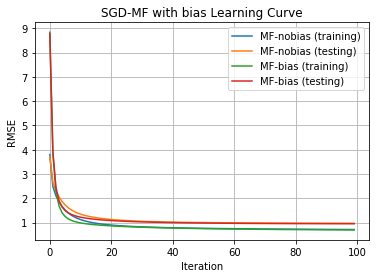

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(100), train_errors_sgd, linestyle='-',  label='MF-nobias (training)')
plt.plot(range(100), test_errors_sgd, linestyle='-', label='MF-nobias (testing)')
plt.plot(range(100), train_errors_sgd_bias, linestyle='-',  label='MF-bias (training)')
plt.plot(range(100), test_errors_sgd_bias, linestyle='-', label='MF-bias (testing)')
plt.title('SGD-MF with bias Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

predicting-computation with bias reach the lowest RMSE (most accuracy performance) faster than that with bo bias

large data (training set) get lower RMSE (better prediction performance) than small data (testing set)

In [ ]:
k_value=range(5,101,5) # number of latent features
alpha = 0.01 # Learning rate
lmbda = 0.1 # Regularisation weight
iteration = 100 # number of iteration
# use stochastic gradient descent to optimize the prediction
for k in k_value:
    k_train_errors_sgd, k_test_errors_sgd = sgd(train_matrix, test_matrix, train_ind, test_ind, k, alpha, lmbda, iteration)

In [ ]:
alpha = 0.01 # Learning rate
lmbda = 0.1 # Regularization weight
iteration = 100 # number of iteration
# use stochastic gradient descent to optimize the prediction
for k in k_value:
    k_train_errors_sgd_bias, k_test_errors_sgd_bias = sgd_bias(train_matrix, test_matrix, train_ind, test_ind,k, alpha, lmbda, iteration)

In [ ]:
plt.plot(k_value, k_train_errors_sgd[-1], linestyle='-',  label='MF-nobias (training)')
plt.plot(k_value, k_test_errors_sgd[-1], linestyle='-', label='MF-nobias (testing)')
plt.plot(k_value, k_train_errors_sgd_bias[-1], linestyle='-',  label='MF-bias (training)')
plt.plot(k_value, k_test_errors_sgd_bias[-1], linestyle='-', label='MF-bias (testing)')
plt.title('SGD-MF with bias Learning Curve')
plt.xlabel('Number of Latent Factors k')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()